0.16463507901234048


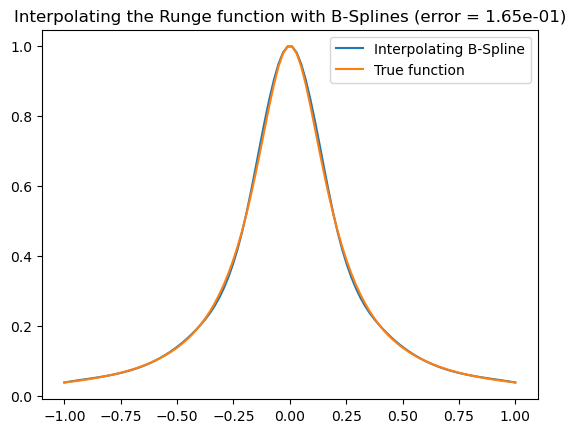

In [24]:
import numpy as np
from scipy.interpolate import BSpline, splrep
import matplotlib.pyplot as plt

def runge(x: float) -> float:
    return 1 / (1 + 25 * x**2)

#Knots
ts = [0.1 + 0.2 * k for k in range(-10, 10, 1)] #?
# Interpolating points
xs = [-1 + 0.2 * k for k in range(11)]
ys = [runge(x) for x in xs]
# Get the data for the Bspline
tck = splrep(xs, ys, s=0, k=3)
# Calculate error
xbars = np.linspace(-1,1,41)
ybars = BSpline(*tck)(xbars)
ytrue = [runge(x) for x in xbars]
error = np.sum(np.abs(ybars - ytrue))
# Plotting
x_plot = np.linspace(min(xs), max(xs), 100)
y_plot = BSpline(*tck)(x_plot)
plt.plot(x_plot, y_plot, label='Interpolating B-Spline')
plt.plot(x_plot, [runge(x) for x in x_plot], label='True function')
plt.legend(loc='best')
plt.title(f"Interpolating the Runge function with B-Splines (error = {error:.2e})")

print(error)

range(2, 21)


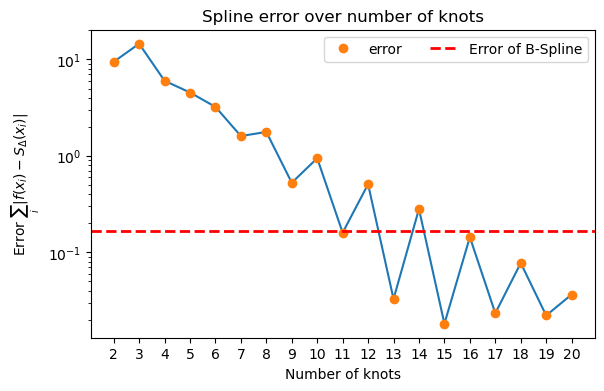

n=2: 9.44812849972556
n=3: 14.578313807966747
n=4: 6.0146641349174175
n=5: 4.542943075714791
n=6: 3.223866268318519
n=7: 1.6050704629223738
n=8: 1.7715561859772926
n=9: 0.5261660068639532
n=10: 0.9443828548168898
n=11: 0.15950340156974002
n=12: 0.5080658718965724
n=13: 0.03270005670481878
n=14: 0.28084279548824936
n=15: 0.01811222321523276
n=16: 0.1434188405571975
n=17: 0.023302334211891707
n=18: 0.07721248234164346
n=19: 0.022064699698631653
n=20: 0.03636788952085353


In [7]:

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def runge(x: float) -> float:
    return 1 / (1 + 25 * x**2)

errors = [] 
steps = range(2,21)
for n in steps:
    #First fit the points
    x = np.linspace(-1,1, n)
    y = runge(x)
    cs = CubicSpline(x, y,bc_type=((2, 0.0), (2, 0.0)))
    #Then calculate the error
    xs = np.linspace(-1, 1, 41)
    ybars= cs(xs)
    error = np.sum(np.abs(ybars - runge(xs)))
    errors.append(error)

print(steps)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(steps, errors)
ax.plot(steps, errors, 'o', label='error')

ax.set_title('Spline error over number of knots')
ax.axhline(0.165,linestyle='--', color='red', lw=2, label='Error of B-Spline')
ax.set_xlabel('Number of knots')
ax.set_ylabel(r'Error $\sum_i|f(x_i) - S_\Delta(x_i)|$')

ax.set_yscale('log')
ax.set_xticks(steps)    
ax.legend(loc='best', ncol=2)

plt.show()

for i,e in enumerate(errors):
    print(f"n={steps[i]}: {e}")